# Text message analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import conversation.message_analizer as ma
from statsmodels.formula.api import ols
import statsmodels.api as sm

df = pd.read_csv("PATH/TO/MESSAGES")

/tmp/ipykernel_10989/2497605655.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Setup

In [2]:

you_id = "CONVERSATION_ID" # CHANE ME

df['time'] = df['sent_at'].map(lambda x: datetime.datetime.fromtimestamp(x/1000.0))

df = df[df['conversationId'] == you_id]

df = df[df['time'] > datetime.datetime.now() - datetime.timedelta(days=30*36)]

df = df[df['time'].notna() & df['body'].notna()]


In [3]:
df['diffs']     = df['time'].sort_values().diff()
df['weekday']   = df['time'].dt.day_name()
df['hour']      = df['time'].dt.hour
df['time']      = pd.to_datetime(pd.to_datetime(df['time']).dt.date)


## Day Frequency

In [4]:
df_you = df[df['type']=='incoming']
df_me  = df[df['type']=='outgoing']

<Axes: title={'center': 'Week-day text frequency'}, xlabel='Weekday', ylabel='Number of texts'>

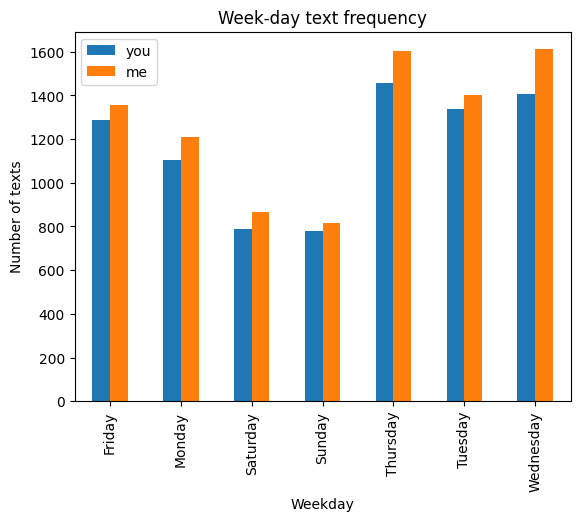

In [5]:
you_weekday = df_you.groupby('weekday').size()
me_weekday  = df_me.groupby('weekday').size()

new_df      = pd.DataFrame(index=you_weekday.index, data={'you': you_weekday.values, 'me': me_weekday.values})
new_df.plot.bar(title='Week-day text frequency', ylabel='Number of texts', xlabel='Weekday')

## Hour of the day

<Axes: title={'center': 'Hour in the day text frequency'}, xlabel='Hour in day', ylabel='Number of texts'>

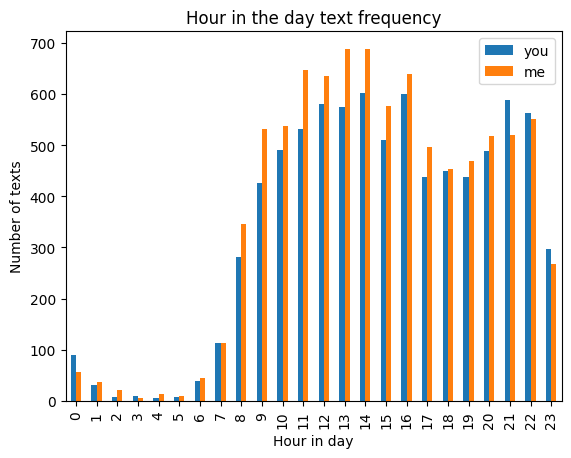

In [6]:
you_hour = df_you.groupby('hour').size()
me_hour  = df_me.groupby('hour').size()

new_df      = pd.DataFrame(index=you_hour.index, data={'you': you_hour.values, 'me': me_hour.values})
new_df.plot.bar(title='Hour in the day text frequency', ylabel='Number of texts', xlabel='Hour in day')

## First message of the day

<Axes: title={'center': 'Who texted first that day'}, xlabel='Date', ylabel='Monthly count'>

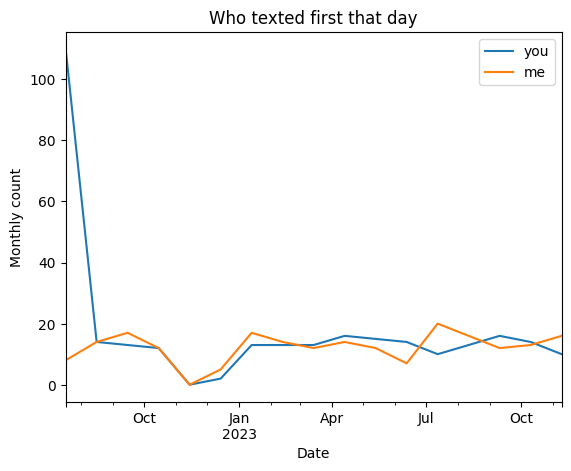

In [7]:

# df_first = df.groupby(pd.Grouper(key='time', freq='1D'))
first_df     = df.loc[df.groupby(pd.Grouper(key='time', freq='1D')).time.idxmin()]
first_df_you = first_df[first_df['type']=='incoming'].groupby(pd.Grouper(key='time', freq='30D')).size()
first_df_me  = first_df[first_df['type']=='outgoing'].groupby(pd.Grouper(key='time', freq='30D')).size()

new_df      = pd.DataFrame(index=first_df_you.index, data={'you': first_df_you.values, 'me': first_df_me.values})
new_df.plot(title='Who texted first that day', ylabel='Monthly count', xlabel='Date')

## Time between texts

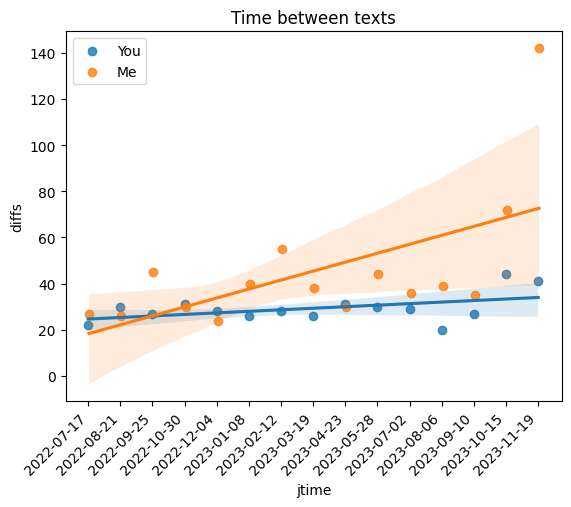

In [8]:
ma.plot_time_between_messages(df)

## Sentiment

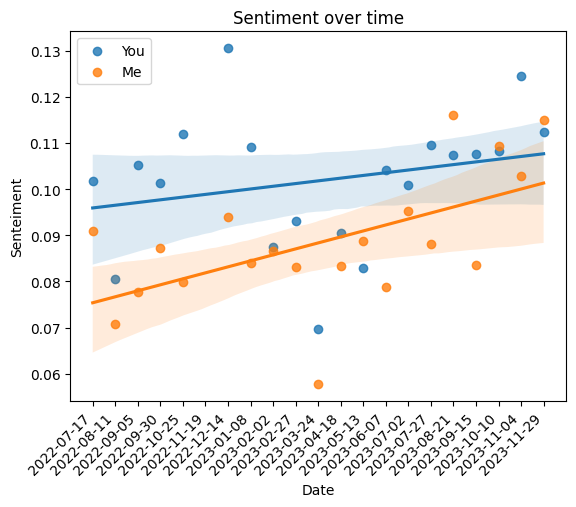

In [14]:
ma.plot_sentiment_aggregate(df, measure='var', days='25D')

## Word clouds

In [10]:
df_you = df[df['type']=='incoming']
df_me  = df[df['type']=='outgoing']

In [11]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop = stopwords.words('english')

#### Your worldcoud

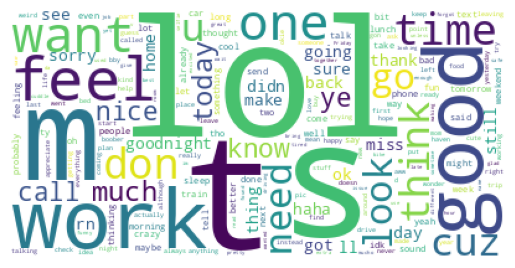

In [12]:
words_me  = df_me['body'].str.split(expand=True).stack()
words_you = df_you['body'].str.split(expand=True).stack()

words_me = words_me.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) and 'http' not in word]))
words_you = words_you.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) and 'http' not in word]))

wordcloud2 = WordCloud(collocations = False, background_color = 'white').generate(' '.join(list(words_you)))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

#### My worldcoud

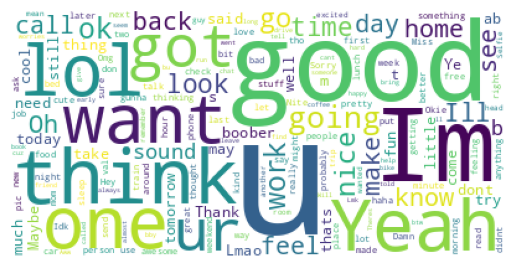

In [13]:
wordcloud2 = WordCloud(collocations = False, background_color = 'white').generate(' '.join(list(words_me)))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()